In [1]:
# Import necessary packages
import pywt
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, ifft
from scipy.io import wavfile
from pylab import *

In [2]:
file = r"H:\Team_project\DCASE_data\dev_gearbox\train\section_00_source_train_normal_0001_volt_2.5.wav"
sample_rate, data = wavfile.read(file)


16000


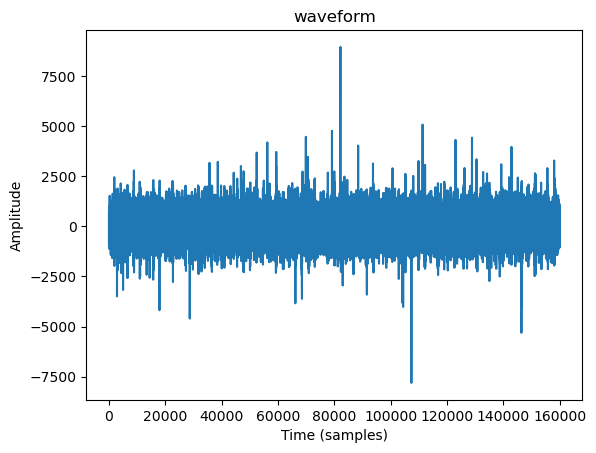

[ 666  403  176 ... -244   14 -525]


In [3]:
# plot the waveform

print(sample_rate)   #check sample rate

plt.figure()
plt.plot(data)
plt.title('waveform')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

print(data)


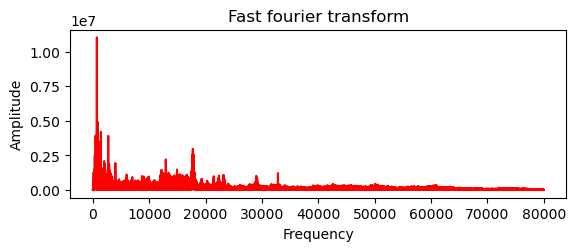

In [4]:
# perform fast fourier transform

data_fft = abs(fft(data))                   #cauculate fast fourier transform and use absolute values (fft is complex numbers list)

plt.figure()
plt.subplot(211)
plt.plot(data_fft[range(int(len(data)/2))], 'r')   #due to symmetry, only use half of the range
plt.title('Fast fourier transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


C:\Users\FlyingFish\AppData\Local\Temp\ipykernel_22680\582199241.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  wavfile.write(filename = "section_00_source_train_normal_0000_volt_1.0_filtered.wav", rate = sample_rate, data = data_filter.astype(data.dtype))


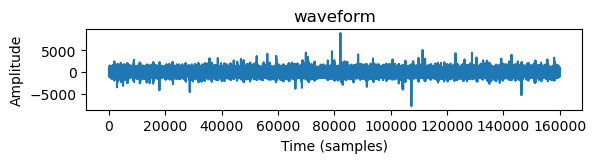

d:\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


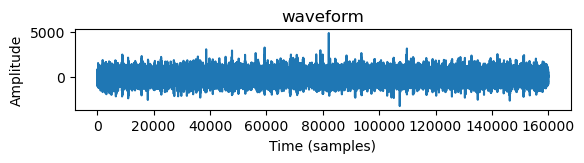

In [5]:
# perform filter

data_cut = fft(data)   #because the above data_fft is of absolute value, which cannot be transformed back to original waveform, so we copy a new one
for i in range(len(data_cut)):
    if i <=130000 and i>=30000:
        data_cut[i] = 0
data_filter = ifft(data_cut)  #transform back from frequencies to signal
wavfile.write(filename = "section_00_source_train_normal_0000_volt_1.0_filtered.wav", rate = sample_rate, data = data_filter.astype(data.dtype))

#plot the waveform plots before and after filtering
""" plt.figure()
plt.subplot(411)
plt.plot(data_fft[range(int(len(data)/2))], 'r')   #due to symmetry, only use half of the range
plt.title('Fast fourier transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


plt.subplot(412)
plt.plot(data_cut[range(int(len(data)/2))], 'r')   #due to symmetry, only use half of the range
plt.title('Fast fourier transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show() """


plt.subplot(411)
plt.plot(data)
plt.title('waveform')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()


plt.subplot(412)
plt.plot(data_filter)
plt.title('waveform')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()